In [7]:
import glob
import os
import time
from scipy.io import loadmat
import cobra
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def flux_transformer(v):

    '''
    This function transforms fluxes into log2 scale with three additions:
    - zero values are kept.
    - values between 0 and 2 are adjusted to fit below one.
    - negative fluxes are considered. 
    '''

    def adjusted(v):
        new = (np.log2(v + 0.125) + 3) / 4
        return np.min([new, 1])

    if v == 0:
        vprime = 0
    elif v > 0:
        if v < 2:
            vprime = adjusted(v)
        else:
            vprime = np.log2(v)
    elif v < 0:
        v = np.abs(v)
        if v < 2:
            vprime = -adjusted(v)
        else:
            vprime = -np.log2(v)
    else:
        raise ValueError('found value not considered')

    return vprime

In [10]:
df_cancer1p=pd.read_csv('C:/Users/NOE/Desktop/TFG/DataFrames Flujos Prueba/df_cancer1p.txt')
df_cancer1p

,\tFlujosC1
0,0\t0.0
1,1\t0.0
2,2\t0.0
3,3\t0.0
4,4\t0.0
...,...
5786,5786\t0.0
5787,5787\t0.0
5788,5788\t0.0
5789,5789\t0.0


In [11]:
df_normal1 = pd.read_csv('C:/Users/NOE/Desktop/Flujos txt/df_normal1.txt', sep='\t')
df_normal2 = pd.read_csv('C:/Users/NOE/Desktop/Flujos txt/df_normal2.txt', sep='\t')
df_normal3 = pd.read_csv('C:/Users/NOE/Desktop/Flujos txt/df_normal3.txt', sep='\t')
df_cancer1 = pd.read_csv('C:/Users/NOE/Desktop/Flujos txt/df_cancer1.txt', sep='\t')
df_cancer2 = pd.read_csv('C:/Users/NOE/Desktop/Flujos txt/df_cancer2.txt', sep='\t')
df_cancer3 = pd.read_csv('C:/Users/NOE/Desktop/Flujos txt/df_cancer3.txt', sep='\t')

In [12]:
print(df_normal1)
print(df_normal2)
print(df_normal3)
print(df_cancer1)
print(df_cancer2)
print(df_cancer3)

        Reacciones  FlujosN1
0     10FTHF7GLUtl       0.0
1     10FTHF7GLUtm       0.0
2         10FTHFtl       0.0
3      11DOCRTSLtm       0.0
4      11DOCRTSLtr       0.0
...            ...       ...
5733  DM_CE1562[c]       0.0
5734  DM_CE5025[c]       0.0
5735     DM_btn[n]       0.0
5736          Htmi       0.0
5737   NADH2_u10mi       0.0

[5738 rows x 2 columns]
               Reacciones  FlujosN2
0            10FTHF7GLUtl       0.0
1            10FTHF7GLUtm       0.0
2                10FTHFtl       0.0
3                10FTHFtm       0.0
4             11DOCRTSLtm       0.0
...                   ...       ...
5674         DM_CE1562[c]       0.0
5675  DM_1a2425thvitd2[m]       0.0
5676            DM_btn[n]       0.0
5677                 Htmi       0.0
5678          NADH2_u10mi       0.0

[5679 rows x 2 columns]
        Reacciones  FlujosN3
0     10FTHF7GLUtl       0.0
1     10FTHF7GLUtm       0.0
2         10FTHFtl       0.0
3         10FTHFtm       0.0
4      11DOCRTSLtm       

In [13]:
print(df_normal2.to_string(index=True))

                                      Reacciones      FlujosN2
0                                   10FTHF7GLUtl  0.000000e+00
1                                   10FTHF7GLUtm  0.000000e+00
2                                       10FTHFtl  0.000000e+00
3                                       10FTHFtm  0.000000e+00
4                                    11DOCRTSLtm  0.000000e+00
5                                    11DOCRTSLtr  0.000000e+00
6                                  11DOCRTSTRNtm  0.000000e+00
7                                  11DOCRTSTRNtr  0.000000e+00
8                                      13DAMPPOX  0.000000e+00
9                                   1a_25VITD2Hm  0.000000e+00
10                                       24NPHte  0.000000e+00
11                                 25HVITD2tin_m  0.000000e+00
12                                 25HVITD3tin_m  0.000000e+00
13                                     25VITD2Hm  0.000000e+00
14                                     25VITD3Hm  0.000

In [15]:
t_df_normal1 = df_normal1['FlujosN1'].apply(flux_transformer)
print(t_df_normal1)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5733    0.0
5734    0.0
5735    0.0
5736    0.0
5737    0.0
Name: FlujosN1, Length: 5738, dtype: float64


In [16]:
all_flows = df_normal1['FlujosN1'].tolist()
print(all_flows)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -500.0, 0.0, 9.865372952814705e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 352.80402858414453, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1000.0, 0.0, 0.0, 0.0, 0.0, 806.6714318374637, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0491347111653804e-14, 0.0, 4.0491347111653804e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 912.8438666097484, -1000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.788196742016572e-29, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 352.8040285841446, 4.500742018212991e-45, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 694.4490260161268, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [17]:
reactions_normal1 = set(df_normal1['Reacciones'])
reactions_normal2 = set(df_normal2['Reacciones'])
reactions_normal3 = set(df_normal3['Reacciones'])
reactions_cancer1 = set(df_cancer1['Reacciones'])
reactions_cancer2 = set(df_cancer2['Reacciones'])
reactions_cancer3 = set(df_cancer3['Reacciones'])
print(reactions_normal1)

{'GLCNACT3g', 'EHGLAT2m', 'DOLICHOL_Uter', 'CRVSM23tev', 'EX_lstnm1[e]', '7DHFtm', 'CDS', 'NDPK2n', 'TCYNTt', 'r1705', 'r2316', 'TYRTA', 'METMETILEt', 'NOS2', 'ARACHETH', 'DNDPt38m', 'r0618', 'NTD9e', 'HMR_0319', 'RE3346M', 'HMR_2718', 'PEPALM_HSPLA2', 'GLCAT9g', 'r0719', 'FAOXC12DCc', 'EX_aflatoxin[e]', 'EX_cspg_c[e]', 'NDP7er', '3OHSUBACtxc', 'GLNtm', 'HMR_1470', 'ECOAH12m', 'CE7081tr', 'HMR_3118', 'HMR_3855', 'DADA', 'HMR_3234', 'HACD1m', 'HEXA2l', 'EX_4mptnl[e]', 'HSD17B7r', 'FAOXC141C121m', 'r2106', 'HMR_3335', 'EX_ptdca[e]', 'EX_nad[e]', 'HMR_0192', 'FAOXC10C10OHm', 'HMR_0808', 'r1377', 'RE1525X', 'BHMT', 'ADPRDP', 'RE2304E', 'r0409', 'RE1526M', 'FAOXC24C22x', 'PRGNLONEtm', 'S6T1g', 'HMR_3726', 'PCHOLN205_HSABCt', 'HMR_3740', 'EX_CE5026[e]', 'HMR_0908', 'r0422', 'NACHEX3ly', 'ALDSTRNtm', 'r1578', 'HMR_2859', 'DGK2m', 'r2379', 'LCAT42e', 'ACGAMtly', 'HMR_6580', 'HMR_3625', 'HMR_3066', 'r1623', '5ADTSTSTERONEtr', 'EX_tetdecaeth[e]', 'C140CPT1', 'EX_pailste_hs[e]', 'ACACT4p', 'SLCBK

In [34]:
#unique_reactions_normal1 = reactions_normal1 - reactions_normal2 - reactions_normal3 - reactions_cancer1 - reactions_cancer2 - reactions_cancer3
#unique_reactions_normal2 = reactions_normal2 - reactions_normal1 - reactions_normal3 - reactions_cancer1 - reactions_cancer2 - reactions_cancer3
#unique_reactions_normal3 = reactions_normal3 - reactions_normal1 - reactions_normal2 - reactions_cancer1 - reactions_cancer2 - reactions_cancer3
#unique_reactions_cancer1 = reactions_cancer1 - reactions_normal1 - reactions_normal2 - reactions_normal3 - reactions_cancer2 - reactions_cancer3
#unique_reactions_cancer2 = reactions_cancer2 - reactions_normal1 - reactions_normal2 - reactions_normal3 - reactions_cancer1 - reactions_cancer3
#unique_reactions_cancer3 = reactions_cancer3 - reactions_normal1 - reactions_normal2 - reactions_normal3 - reactions_cancer1 - reactions_cancer2


In [18]:
reacciones_a_agregar_normal1 = (
    reactions_normal2 | reactions_normal3 |
    reactions_cancer1 | reactions_cancer2 | reactions_cancer3
) - reactions_normal1
reacciones_a_agregar_normal1

{'10FTHFtm',
 '13DAMPPte',
 '13_CIS_RETNte',
 '15KPROSTGF2t',
 '1a_25VITD2Hm',
 '2OBUTt',
 '2OXOADPt',
 '34HPLtm',
 '35DHPVStep',
 '3AIBSYMPt',
 '3ANTHRNtr',
 '3DHCDCHOLt2',
 '3DPHBH1',
 '3HPVSTETtev',
 '3ISPVStep',
 '3SALAOX',
 '4HBZtm',
 '56DHPVStev',
 '56EPPVStev',
 '5EIPENCm',
 '5EIPENCte',
 '5EIPENCtm',
 '6EPVStep',
 '6HLVSTthep',
 '6MELVSTthep',
 '7HPVStev',
 'A4GNT1g',
 'A4GNT2g',
 'ABO3g',
 'ABO4g',
 'ABO5g',
 'ABO6g',
 'ABO7g',
 'ABO8g',
 'ABO9g',
 'ACER23g',
 'ACER31r',
 'ACGALFUCGALACGALFUC12GAL14ACGLCGALGLUSIDEte',
 'ACGALFUCGALACGALFUC12GAL14ACGLCGALGLUSIDEtg',
 'ACGALFUCGALACGALFUCGALACGLCGAL14ACGLCGALGLUSIDEte',
 'ACGALFUCGALACGALFUCGALACGLCGAL14ACGLCGALGLUSIDEtg',
 'ACGALtlg',
 'ACGALtr',
 'ACGBGBSIDEtg',
 'ACGBGBSIDEtl',
 'ACNGALACGLCGAL14ACGLCGALGLUSIDEtg',
 'ACSRTNMT',
 'ACt2m',
 'ADNt4',
 'ADRNLtu',
 'AGTix',
 'AK2LGCHOLt1',
 'ALADGLNexR',
 'ALADGLYexR',
 'ALAGLNexR',
 'ALAGLYexR',
 'ALAR',
 'ALAyLATthc',
 'ALLOP1tu',
 'ALLOP2tu',
 'ALLOPOXDhep',
 'AMACR2p',
 'ANDRS

In [19]:
añadir_normal1=pd.DataFrame({'Reacciones':list(reacciones_a_agregar_normal1), 'FlujosN1': [0]*len(reacciones_a_agregar_normal1)})
añadir_normal1

,Reacciones,FlujosN1
0,GALFUCGALACGLCGAL14ACGLCGALGLUSIDEtg,0
1,EX_allop[e],0
2,r1834,0
3,OCCOAtx,0
4,EX_ribflv[e],0
...,...,...
854,r1847,0
855,EX_hLkynr[e],0
856,FOLOAT2tc,0
857,ASNPHEASPt,0


In [20]:

df_normal1 = pd.concat([df_normal1, añadir_normal1])
df_normal1

,Reacciones,FlujosN1
0,10FTHF7GLUtl,0.0
1,10FTHF7GLUtm,0.0
2,10FTHFtl,0.0
3,11DOCRTSLtm,0.0
4,11DOCRTSLtr,0.0
...,...,...
854,r1847,0.0
855,EX_hLkynr[e],0.0
856,FOLOAT2tc,0.0
857,ASNPHEASPt,0.0


In [21]:
reacciones_a_agregar_normal2 = (
    reactions_normal1 | reactions_normal3 |
    reactions_cancer1 | reactions_cancer2 | reactions_cancer3
) - reactions_normal2
reacciones_a_agregar_normal2

añadir_normal2=pd.DataFrame({'Reacciones':list(reacciones_a_agregar_normal2), 'FlujosN2': [0]*len(reacciones_a_agregar_normal2)})
añadir_normal2

df_normal2 = pd.concat([df_normal2, añadir_normal2])
df_normal2

,Reacciones,FlujosN2
0,10FTHF7GLUtl,0.0
1,10FTHF7GLUtm,0.0
2,10FTHFtl,0.0
3,10FTHFtm,0.0
4,11DOCRTSLtm,0.0
...,...,...
913,r1847,0.0
914,EX_hLkynr[e],0.0
915,EX_gt1a_hs[e],0.0
916,FOLOAT2tc,0.0


In [9]:
reacciones_a_agregar_normal3 = (
    reactions_normal1 | reactions_normal2 |
    reactions_cancer1 | reactions_cancer2 | reactions_cancer3
) - reactions_normal3
reacciones_a_agregar_normal3

añadir_normal3=pd.DataFrame({'Reacciones':list(reacciones_a_agregar_normal3), 'FlujosN3': [0]*len(reacciones_a_agregar_normal3)})
añadir_normal3

df_normal3 = pd.concat([df_normal3, añadir_normal3])
df_normal3

,Reacciones,FlujosN3
0,10FTHF7GLUtl,0.0
1,10FTHF7GLUtm,0.0
2,10FTHFtl,0.0
3,10FTHFtm,0.0
4,11DOCRTSLtm,0.0
...,...,...
2054,HMR_8567,0.0
2055,EX_35dsmv[e],0.0
2056,r1641,0.0
2057,HMR_8579,0.0


In [10]:
reacciones_a_agregar_cancer1 = (
    reactions_normal1 | reactions_normal2 |
    reactions_normal3 | reactions_cancer2 | reactions_cancer3
) - reactions_cancer1
reacciones_a_agregar_cancer1

añadir_cancer1=pd.DataFrame({'Reacciones':list(reacciones_a_agregar_cancer1), 'FlujosC1': [0]*len(reacciones_a_agregar_cancer1)})
añadir_cancer1

df_cancer1 = pd.concat([df_cancer1, añadir_cancer1])
df_cancer1

,Reacciones,FlujosC1
0,10FTHF7GLUtl,0.0
1,10FTHF7GLUtm,0.0
2,10FTHFtl,0.0
3,10FTHFtm,0.0
4,11DOCRTSLtm,0.0
...,...,...
801,HMR_2865,0.0
802,EX_glygly[e],0.0
803,ALLOP2tu,0.0
804,EX_atvacid[e],0.0


In [11]:
reacciones_a_agregar_cancer2 = (
    reactions_normal1 | reactions_normal2 |
    reactions_normal3 | reactions_cancer1 | reactions_cancer3
) - reactions_cancer2
reacciones_a_agregar_cancer2

añadir_cancer2=pd.DataFrame({'Reacciones':list(reacciones_a_agregar_cancer2), 'FlujosC2': [0]*len(reacciones_a_agregar_cancer2)})
añadir_cancer2

df_cancer2 = pd.concat([df_cancer2, añadir_cancer2])
df_cancer2

,Reacciones,FlujosC2
0,10FTHF7GLUtl,0.0
1,10FTHF7GLUtm,0.0
2,10FTHFtl,0.0
3,10FTHFtm,-1000.0
4,13DAMPPOX,0.0
...,...,...
1100,RE0549C,0.0
1101,DOPAQNISO1,0.0
1102,EX_glygly[e],0.0
1103,EX_atvacid[e],0.0


In [12]:
reacciones_a_agregar_cancer3 = (
    reactions_normal1 | reactions_normal2 |
    reactions_normal3 | reactions_cancer1 | reactions_cancer2
) - reactions_cancer3
reacciones_a_agregar_cancer3

añadir_cancer3=pd.DataFrame({'Reacciones':list(reacciones_a_agregar_cancer3), 'FlujosC3': [0]*len(reacciones_a_agregar_cancer3)})
añadir_cancer3

df_cancer3 = pd.concat([df_cancer3, añadir_cancer3])
df_cancer3

,Reacciones,FlujosC3
0,10FTHF7GLUtl,0.0
1,10FTHF7GLUtm,0.0
2,10FTHFtl,0.0
3,10FTHFtm,0.0
4,11DOCRTSLtm,0.0
...,...,...
941,DOPAQNISO1,0.0
942,EX_glygly[e],0.0
943,ALLOP2tu,0.0
944,EX_atvacid[e],0.0


In [27]:
n1n2 = pd.merge(df_normal1, df_normal2, on='Reacciones', how='outer')
n1n2n3 = pd.merge(n1n2, df_normal3, on='Reacciones', how='outer')
nc1 = pd.merge(n1n2n3, df_cancer1, on='Reacciones', how='outer')
nc1c2 = pd.merge(nc1, df_cancer2, on='Reacciones', how='outer')
df_flujos = pd.merge(nc1c2, df_cancer3, on='Reacciones', how='outer')
df_flujos


,Reacciones,FlujosN1,FlujosN2,FlujosN3,FlujosC1,FlujosC2,FlujosC3
0,10FTHF7GLUtl,0.0,0.0,0.0,0.0,0.0,0.0
1,10FTHF7GLUtm,0.0,0.0,0.0,0.0,0.0,0.0
2,10FTHFtl,0.0,0.0,0.0,0.0,0.0,0.0
3,11DOCRTSLtm,0.0,0.0,0.0,0.0,0.0,0.0
4,11DOCRTSLtr,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
6592,r1814,0.0,0.0,0.0,0.0,0.0,0.0
6593,RE0549C,0.0,0.0,0.0,0.0,0.0,0.0
6594,ALLOP2tu,0.0,0.0,0.0,0.0,0.0,0.0
6595,EX_atvacid[e],0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
def flux_transformer(v):

    '''
    This function transforms fluxes into log2 scale with three additions:
    - zero values are kept.
    - values between 0 and 2 are adjusted to fit below one.
    - negative fluxes are considered. 
    '''

    def adjusted(v):
        new = (np.log2(v + 0.125) + 3) / 4
        return np.min([new, 1])

    if v == 0:
        vprime = 0
    elif v > 0:
        if v < 2:
            vprime = adjusted(v)
        else:
            vprime = np.log2(v)
    elif v < 0:
        v = np.abs(v)
        if v < 2:
            vprime = -adjusted(v)
        else:
            vprime = -np.log2(v)
    else:
        raise ValueError('found value not considered')

    return vprime

In [114]:
columns_to_transform = ['FlujosN1', 'FlujosN2', 'FlujosN3', 'FlujosC1', 'FlujosC2', 'FlujosC3']
t_df_fluxes = df_flujos[columns_to_transform].applymap(flux_transformer)
#t_df_fluxes['Reacciones'] = df_flujos['Reacciones']
t_df_fluxes
print(t_df_fluxes.to_string(index=True))

          FlujosN1      FlujosN2      FlujosN3      FlujosC1      FlujosC2      FlujosC3
0     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
1     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
2     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
3     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
4     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
5     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
6     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
7     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
8     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
9     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
10    0.000000e+00  0

In [115]:
variability = t_df_fluxes.std(axis = 0)

s_cols = variability.sort_values(ascending = False)
s_cols = s_cols.head(200)
s_colnames = s_cols.index
var_df = t_df_fluxes[s_colnames]
var_df

,FlujosC2,FlujosC1,FlujosN3,FlujosN2,FlujosN1,FlujosC3
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
6592,0.0,0.0,0.0,0.0,0.0,0.0
6593,0.0,0.0,0.0,0.0,0.0,0.0
6594,0.0,0.0,0.0,0.0,0.0,0.0
6595,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
from scipy import stats
from statsmodels.stats import multitest
import seaborn as sns

In [103]:
df = pd.DataFrame({
    'Reacciones': t_df_fluxes['Reacciones'],
    'FlujosN1': t_df_fluxes['FlujosN1'],
    'FlujosC1': t_df_fluxes['FlujosC1'],
})
df

,Reacciones,FlujosN1,FlujosC1
0,10FTHF7GLUtl,0.0,0.0
1,10FTHF7GLUtm,0.0,0.0
2,10FTHFtl,0.0,0.0
3,11DOCRTSLtm,0.0,0.0
4,11DOCRTSLtr,0.0,0.0
...,...,...,...
6592,r1814,0.0,0.0
6593,RE0549C,0.0,0.0
6594,ALLOP2tu,0.0,0.0
6595,EX_atvacid[e],0.0,0.0


In [109]:
df['T-Statistic'] = np.nan
df['P-Value'] = np.nan

# Realizar t-test independiente para cada fila
for index, row in df.iterrows():
   try:
        # Verificar si hay suficiente variabilidad en los datos
        if np.var([row['FlujosN1'], row['FlujosC1']]) > 0:
            t_statistic, p_value = stats.ttest_ind([row['FlujosN1']], [row['FlujosC1']], nan_policy='omit')
            df.at[index, 'T-Statistic'] = t_statistic
            df.at[index, 'P-Value'] = p_value
        else:
            # Asignar NaN si no hay suficiente variabilidad
            df.at[index, 'T-Statistic'] = np.nan
            df.at[index, 'P-Value'] = np.nan
            print(f"Poca variabilidad en la fila {index}")
    except Exception as e:
        print(f"Error en la fila {index}: {e}")

# Imprimir DataFrame con resultados del t-test
print(df[['Reacciones', 'T-Statistic', 'P-Value']])



IndentationError: unindent does not match any outer indentation level (<tokenize>, line 17)

In [110]:
for index, row in df.iterrows():
    try:
        # Verificar si hay suficiente variabilidad en los datos
        if np.var([row['FlujosN1'], row['FlujosC1']]) > 0:
            t_statistic, p_value = stats.ttest_ind([row['FlujosN1']], [row['FlujosC1']], nan_policy='omit')
            df.at[index, 'T-Statistic'] = t_statistic
            df.at[index, 'P-Value'] = p_value
        else:
            # Asignar NaN si no hay suficiente variabilidad
            df.at[index, 'T-Statistic'] = np.nan
            df.at[index, 'P-Value'] = np.nan
            print(f"Poca variabilidad en la fila {index}")
    except Exception as e:
        print(f"Error en la fila {index}: {e}")

# Imprimir DataFrame con resultados del t-test
print(df[['Reacciones', 'T-Statistic', 'P-Value']])

Poca variabilidad en la fila 0
Poca variabilidad en la fila 1
Poca variabilidad en la fila 2
Poca variabilidad en la fila 3
Poca variabilidad en la fila 4
Poca variabilidad en la fila 5
Poca variabilidad en la fila 6
Poca variabilidad en la fila 7
Poca variabilidad en la fila 8
Poca variabilidad en la fila 9
Poca variabilidad en la fila 10
Poca variabilidad en la fila 11
Poca variabilidad en la fila 12
Poca variabilidad en la fila 13
Poca variabilidad en la fila 14
Poca variabilidad en la fila 15
Poca variabilidad en la fila 16
Poca variabilidad en la fila 17
Poca variabilidad en la fila 18
Poca variabilidad en la fila 20
Poca variabilidad en la fila 22
Poca variabilidad en la fila 23
Poca variabilidad en la fila 24
Poca variabilidad en la fila 25
Poca variabilidad en la fila 26
Poca variabilidad en la fila 27
Poca variabilidad en la fila 28
Poca variabilidad en la fila 29
Poca variabilidad en la fila 30
Poca variabilidad en la fila 31
Poca variabilidad en la fila 32
Poca variabilidad 

C:\Users\NOE\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


Poca variabilidad en la fila 1215
Poca variabilidad en la fila 1216
Poca variabilidad en la fila 1217
Poca variabilidad en la fila 1218
Poca variabilidad en la fila 1220
Poca variabilidad en la fila 1221
Poca variabilidad en la fila 1222
Poca variabilidad en la fila 1223
Poca variabilidad en la fila 1224
Poca variabilidad en la fila 1225
Poca variabilidad en la fila 1227
Poca variabilidad en la fila 1228
Poca variabilidad en la fila 1229
Poca variabilidad en la fila 1230
Poca variabilidad en la fila 1231
Poca variabilidad en la fila 1232
Poca variabilidad en la fila 1233
Poca variabilidad en la fila 1234
Poca variabilidad en la fila 1235
Poca variabilidad en la fila 1236
Poca variabilidad en la fila 1237
Poca variabilidad en la fila 1238
Poca variabilidad en la fila 1239
Poca variabilidad en la fila 1240
Poca variabilidad en la fila 1241
Poca variabilidad en la fila 1244
Poca variabilidad en la fila 1245
Poca variabilidad en la fila 1246
Poca variabilidad en la fila 1247
Poca variabili

Poca variabilidad en la fila 2403
Poca variabilidad en la fila 2404
Poca variabilidad en la fila 2405
Poca variabilidad en la fila 2406
Poca variabilidad en la fila 2407
Poca variabilidad en la fila 2409
Poca variabilidad en la fila 2410
Poca variabilidad en la fila 2411
Poca variabilidad en la fila 2412
Poca variabilidad en la fila 2413
Poca variabilidad en la fila 2414
Poca variabilidad en la fila 2415
Poca variabilidad en la fila 2416
Poca variabilidad en la fila 2417
Poca variabilidad en la fila 2418
Poca variabilidad en la fila 2419
Poca variabilidad en la fila 2420
Poca variabilidad en la fila 2421
Poca variabilidad en la fila 2422
Poca variabilidad en la fila 2423
Poca variabilidad en la fila 2424
Poca variabilidad en la fila 2425
Poca variabilidad en la fila 2426
Poca variabilidad en la fila 2427
Poca variabilidad en la fila 2428
Poca variabilidad en la fila 2429
Poca variabilidad en la fila 2430
Poca variabilidad en la fila 2431
Poca variabilidad en la fila 2432
Poca variabili

Poca variabilidad en la fila 4501
Poca variabilidad en la fila 4502
Poca variabilidad en la fila 4503
Poca variabilidad en la fila 4504
Poca variabilidad en la fila 4505
Poca variabilidad en la fila 4506
Poca variabilidad en la fila 4507
Poca variabilidad en la fila 4508
Poca variabilidad en la fila 4509
Poca variabilidad en la fila 4510
Poca variabilidad en la fila 4511
Poca variabilidad en la fila 4512
Poca variabilidad en la fila 4513
Poca variabilidad en la fila 4514
Poca variabilidad en la fila 4515
Poca variabilidad en la fila 4516
Poca variabilidad en la fila 4517
Poca variabilidad en la fila 4518
Poca variabilidad en la fila 4519
Poca variabilidad en la fila 4520
Poca variabilidad en la fila 4521
Poca variabilidad en la fila 4522
Poca variabilidad en la fila 4523
Poca variabilidad en la fila 4524
Poca variabilidad en la fila 4526
Poca variabilidad en la fila 4527
Poca variabilidad en la fila 4528
Poca variabilidad en la fila 4529
Poca variabilidad en la fila 4530
Poca variabili

Poca variabilidad en la fila 6118
Poca variabilidad en la fila 6119
Poca variabilidad en la fila 6120
Poca variabilidad en la fila 6121
Poca variabilidad en la fila 6122
Poca variabilidad en la fila 6123
Poca variabilidad en la fila 6124
Poca variabilidad en la fila 6125
Poca variabilidad en la fila 6127
Poca variabilidad en la fila 6128
Poca variabilidad en la fila 6129
Poca variabilidad en la fila 6130
Poca variabilidad en la fila 6132
Poca variabilidad en la fila 6133
Poca variabilidad en la fila 6134
Poca variabilidad en la fila 6135
Poca variabilidad en la fila 6136
Poca variabilidad en la fila 6137
Poca variabilidad en la fila 6138
Poca variabilidad en la fila 6139
Poca variabilidad en la fila 6140
Poca variabilidad en la fila 6141
Poca variabilidad en la fila 6142
Poca variabilidad en la fila 6143
Poca variabilidad en la fila 6144
Poca variabilidad en la fila 6145
Poca variabilidad en la fila 6146
Poca variabilidad en la fila 6147
Poca variabilidad en la fila 6148
Poca variabili

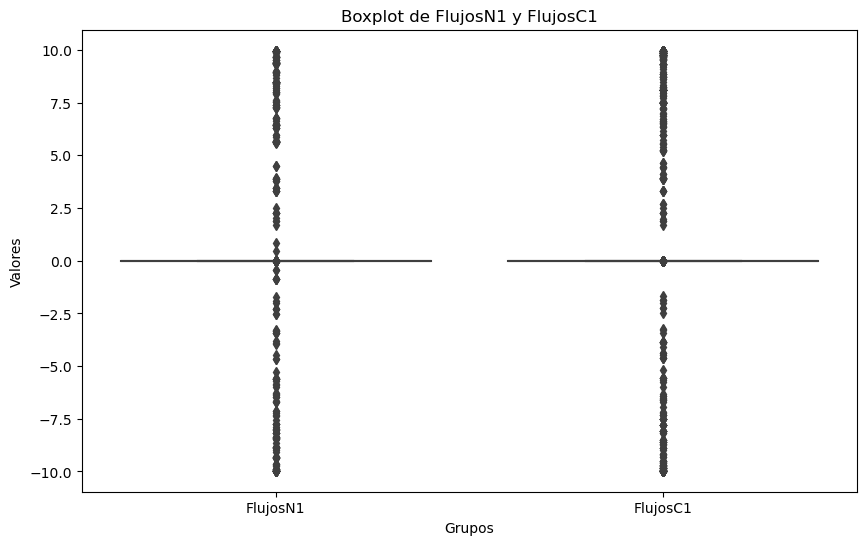

In [111]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['FlujosN1', 'FlujosC1']])
plt.title('Boxplot de FlujosN1 y FlujosC1')
plt.xlabel('Grupos')
plt.ylabel('Valores')
plt.show()

In [104]:

df['T-Statistic'] = np.nan
df['P-Value'] = np.nan

# Realizar t-test independiente para cada fila
for index, row in df.iterrows():
    t_statistic, p_value = stats.ttest_ind([row['FlujosN1']], [row['FlujosC1']], nan_policy='omit')
    df.at[index, 'T-Statistic'] = t_statistic
    df.at[index, 'P-Value'] = p_value
# Crear el Volcano Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LogFoldChange', y='MinusLogP', data=t_df_fluxes, hue='MinusLogP > Threshold', palette={False: 'grey', True: 'red'}, s=100)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=threshold, color='black', linestyle='--', linewidth=1)
plt.title('Volcano Plot - Comparación entre FlujosN1 y FlujosC1')
plt.xlabel('Log Fold Change (FlujosC1 vs FlujosN1)')
plt.ylabel('-log10(p-value)')

C:\Users\NOE\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


ValueError: Could not interpret value `MinusLogP > Threshold` for parameter `hue`

<Figure size 1000x600 with 0 Axes>

In [96]:
flujos_n1 = t_df_fluxes['FlujosN1']
flujos_c1 = t_df_fluxes['FlujosC1']
t_statistic, p_value = stats.ttest_ind(flujos_n1, flujos_c1, nan_policy='omit')

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: -1.5073131403660833
P-Value: 0.13175435636327432


In [40]:

t_stat, p_value = stats.ttest_ind(flujos_n1, flujos_c1)
def calculate_p_value(row):
    t_stat, p_value = stats.ttest_ind(row['FlujosN1'], row['FlujosC1'])
    return p_value

# Aplica la función a cada fila del DataFrame y crea una nueva columna 'p_value'
df_fluxes['p_value'] = df_fluxes.apply(calculate_p_value, axis=1)

print(p_values)

[0.09222133 0.35976604 0.2194382 ]
